# EDA to Prediction (DieTitanic)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale = 2)

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the Age, Cabin and Embarked have null values. I will try to fix them.

# How many Survived??

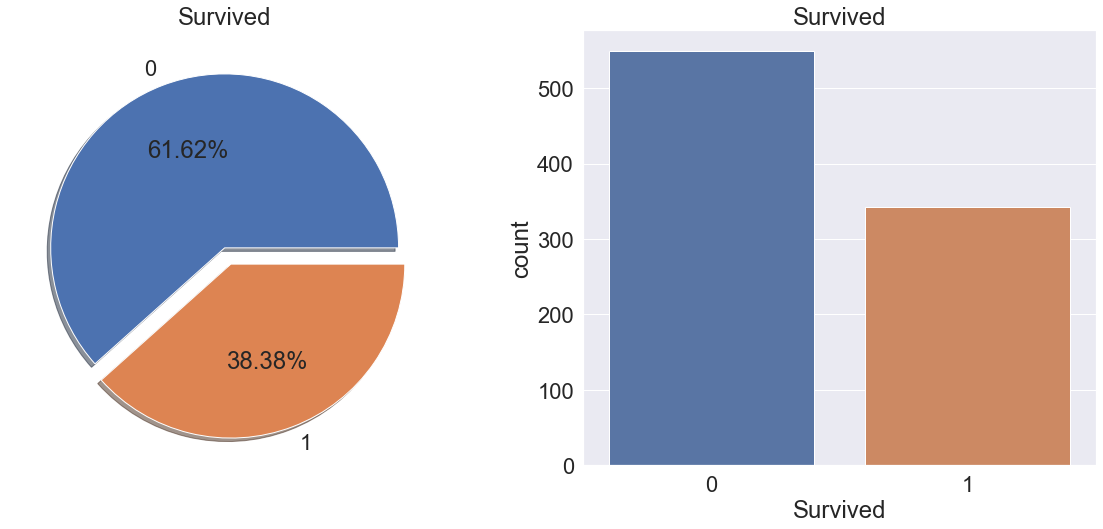

In [9]:
# 1행 2열 18-8크기의 figure를 생성
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.2f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

it is evident that not many passengers survived the accident.

* Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the totla training set survivied the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

* we will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.

* First let us understand the different types of features.

# Types Of Features

## Categorical Features:
- A categorical variables is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannnot sort or give any ordering to such variables. They are alse known as Nominal Variables.

Categorical Features in the dataset : Sex, Embarked.

Ordinal Features:
- An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 
- For eg: If we have a feature like Height with values Tall, Medium, short, then Height is a ordinal variable.
- Here we can have a relative sort in the variable.

Ordinal Features in the dataset : PClass


## Continuous Feature:
- A feature is said to be continuous if ti can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset : Age

# Analysing the Features

Sex -> categorical Feature

In [10]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

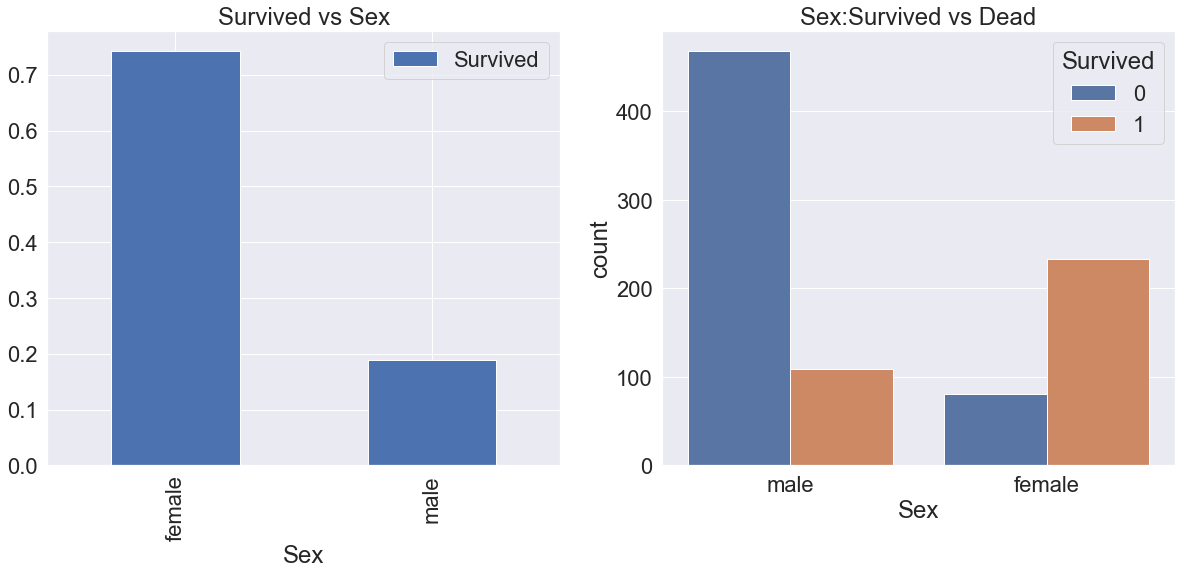

In [11]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- This looks interesting.
- The number of men on the ship is lot more than the number of women. 
- Still the number of women saved is almost twice the number of males saved.
- The survival rates for a women on the ship is around 75% while that for men in around 18-10%.
- This looks to be a very important feature for modeling.
- Bur is it the best?
- Let's check other features.

Pclass -> Ordinal Feature

In [12]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


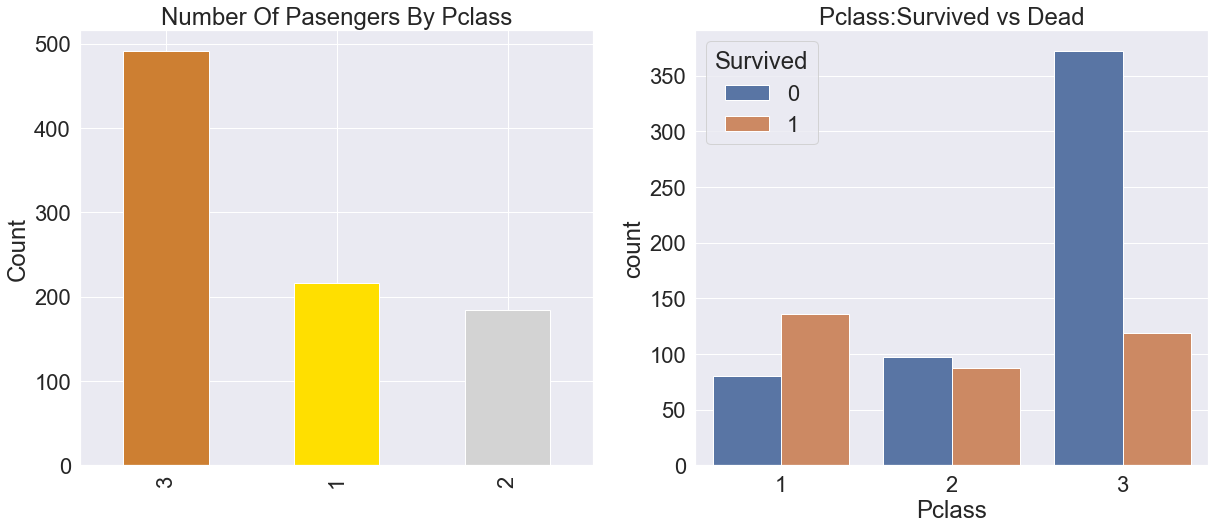

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Pasengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passengers OF Pclass 1 were given a very high priority while rescue.

Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1% survived is around 63% while ofr Pclass 2 is around 48%.

So money and status matters.

Such as materialistic world.

Lets Dive in little bit more and check for other interesting observations.

Lets check survival rate with Wex and Pclass Togeter.

In [14]:
pd.crosstab([data['Sex'], data['Survived']], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

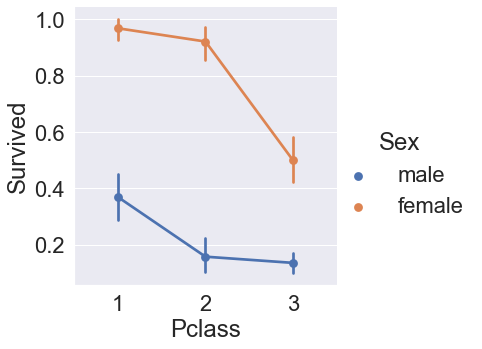

In [15]:
# (x축 데이터, y축 데이터, 범주, 데이터)
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

We use FactorPlot in this case, becuase they make the seperation of categorical values easy.
*FactorPlot는 분류형 데이터를 더 분리하기 쉽다.*

Looking at the CrossTab and the FactorPlot. we can easily infer that survival for Women  from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

*여자 Pclass1은 94명 중에 3명만 죽어 생존률이 95-96%나 된다.*

It is evient that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

*Pclass와는 관련이 없고 여자는 가장 중요한 구조요소 였다.*

Looks like Pclass is alse an important feature. Lets analyse other features.


## Age -> Continuous Feature

In [16]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [17]:
# describe 메소드를 사용하면 통계정보를 바로 알 수 있다.
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

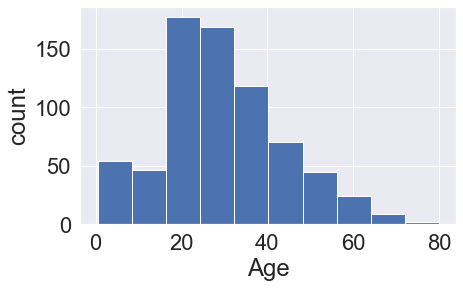

In [18]:
# 히스로그램은 주로 continuous한 정보를 파악할 때 사용한다.
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('count')

Text(0, 0.5, 'count')

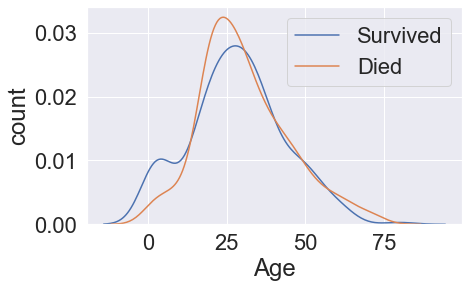

In [19]:
# 이진 분류의 경우 continuous 데이터를 파악할 때 활용
# 나이에 따라 생존 여부를 한눈에 파악하기
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], label = 'Survived')
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], label = 'Died')
# sns.kdeplot(data['Age'], hue = data['Survived'])
plt.legend() # 범례 표시를 위한 메소드
plt.xlabel('Age')
plt.ylabel('count')

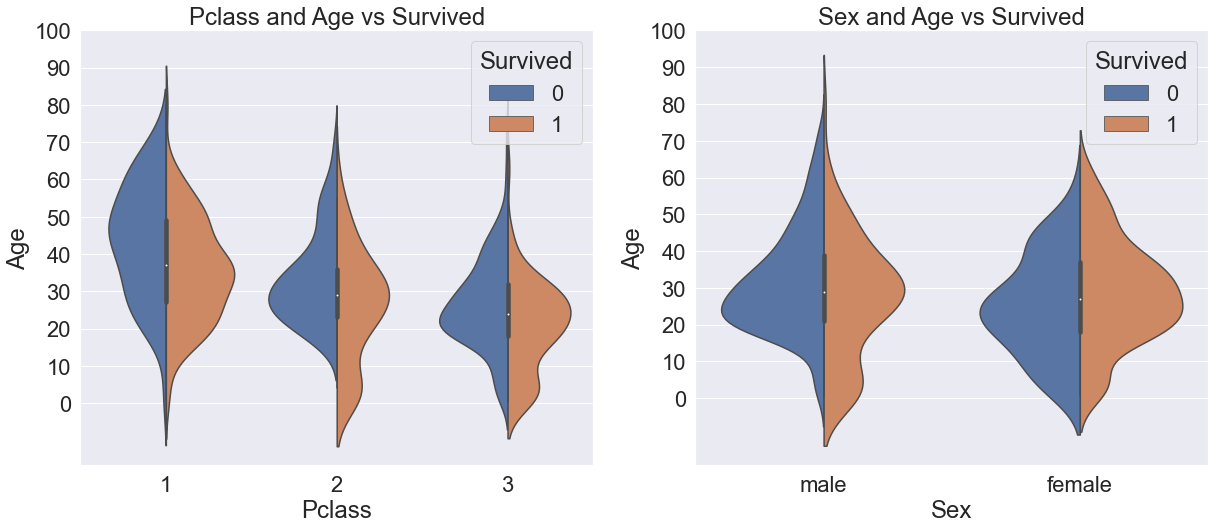

In [20]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Observations:
1. The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrecspective of the Pclass. 
*아이들의 수는 Pclass가 높아질 수록 많아지고, 10살 미만의 승객의 생존률은 Pclass와 무관하게 좋아진다는 사실을 알 수 있다.*

2. Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for women.

*Pclass1의 20-50살의 승객의 생존룰은 높고 이는 여자이면 더 높다. 다른 차트인데 비교 가능?*

3. For males, the survival chances decreases with and increase in age.\

*남자의 생존률은 나이가 증가함에 따라 낮아진다.*

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

*나이 Feature에는 177개의 빈 값이 있다. 이 빈 값을 평균 값으로 추정할 수 있다.*

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!! we can check the Name feature. Looking upon the feature, we can see that the names have salutation like Mr or Mrs. Thus we can assign the mean values of mr and Mrs to the respective groups
*Name Feature에서 Mr나 Mrs를 이용하여 나이를 추정한다.*

**What's in a Name? -> Feature**

In [21]:
# data에 Initial 열 추가
data['Initial'] = 0

# extract메소드 정규표현식에 대한 것을 추출가능 문자에 .이 붙은 것을 추출
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [22]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values

* *Mlle나 Mme는 Miss를 잘못 쓴 것이다.*
* *어떻게 이를 알았나????*
* *프랑스어로 Mme는 여자를 의미하고, Mlle는 결혼하지 않은 여자를 의미한다.*

In [23]:
# 바꾸기
# inplace = True 원본 데이터가 바뀐다.
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [24]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [25]:
# 각 그룹의 평균 값으로 빈 값을 채우기
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [26]:
data.isnull().sum()
# null 데이터가 있는지 없는지 알 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

null data는 채워야 하는 경우도 있고 그렇지 않은 경우도 있다.
이는 모델에 적용했을 때 어떤 경우가 더 결과가 좋은지 여부로 판단한다.
여기서는 Age의 Null data를 각 그룹의 평균 값으로 채워주었다.

캐글 머신러닝 문제를 풀 때 해야하는 일
1. Null Data를 체크한다.
2. EDA를 진행한다.
3. Cross Vallidation system을 빠르게 만들어야한다.
=> 좋은 CV를 만들었는지 판단하는 여부는 Leaderboard 값과 CV의 값이 비슷한 정도 판단한다.

=> 제출수가 제한이 있기 때문에 CV가 LB score와 선형적으로 일치하는 것을 찾는 것이 아주 중요하다.

=> 캐글에서 Public Leaderboard에서 좋은 점수를 받을 수 있지만 Private Leaderboard에서는 좋은 점수를 받지 못할 수 있다. Private이 진짜 등수이다.

=> Discussion을 통해 고수들의 노하우를 알 수 있다.

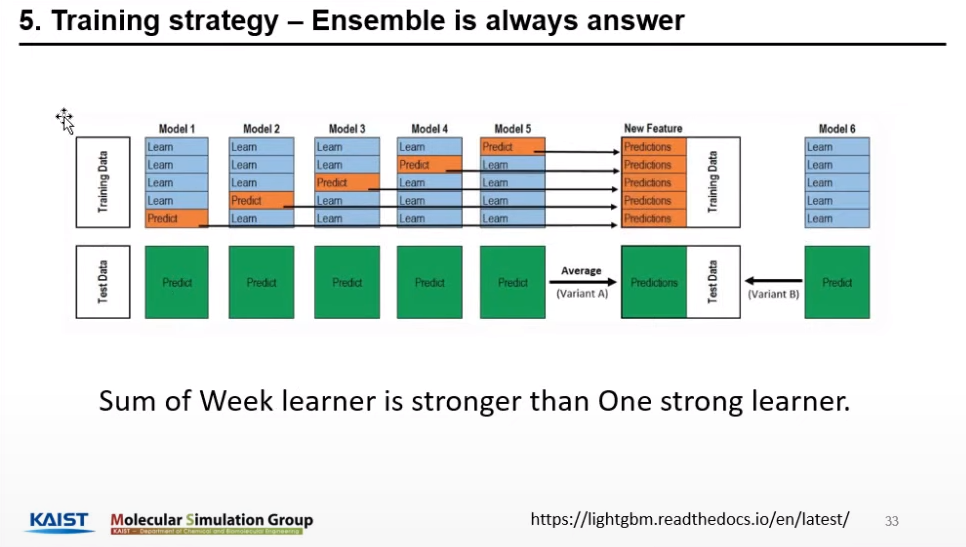


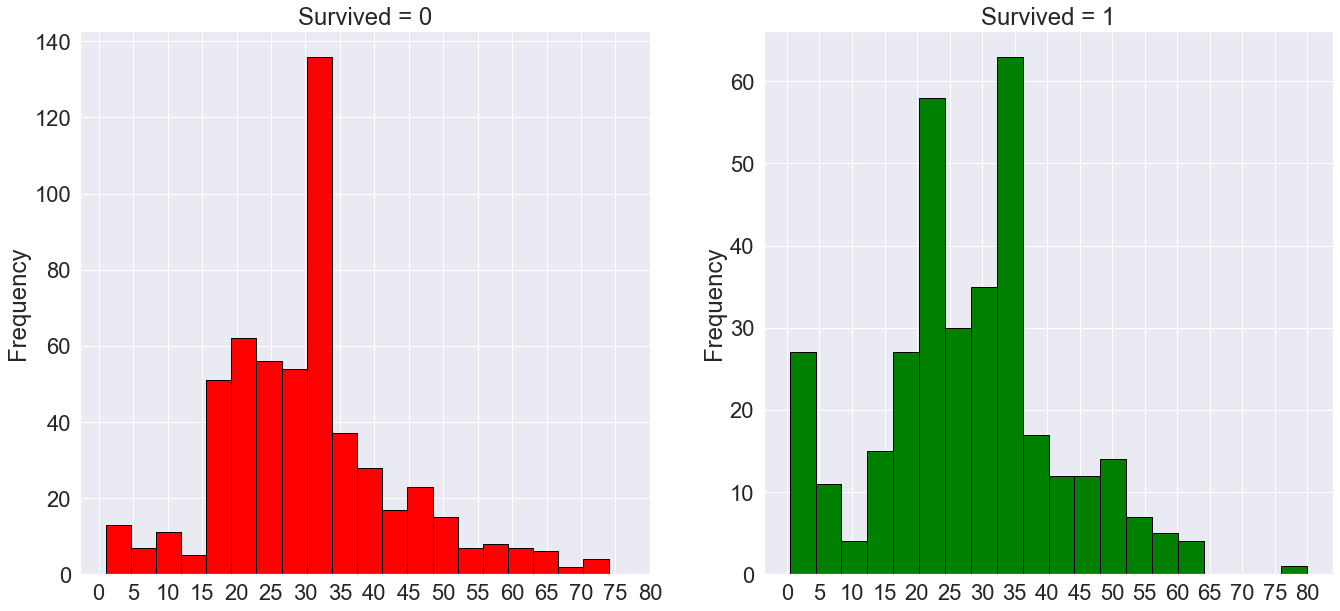

In [27]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data.loc[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

Observations:

1) The Toddlers(age<5) were saved in large numbers(The Women and Chile First Policy).
- 5세 이하는 생존자가 많다.

2) The oldest Passenger was saved(80 years).
- 최고령자는 살았다.

3) Maximum number of deaths were in the age group of 30-40.
- 30-40대가 사망자가 가장 많다.

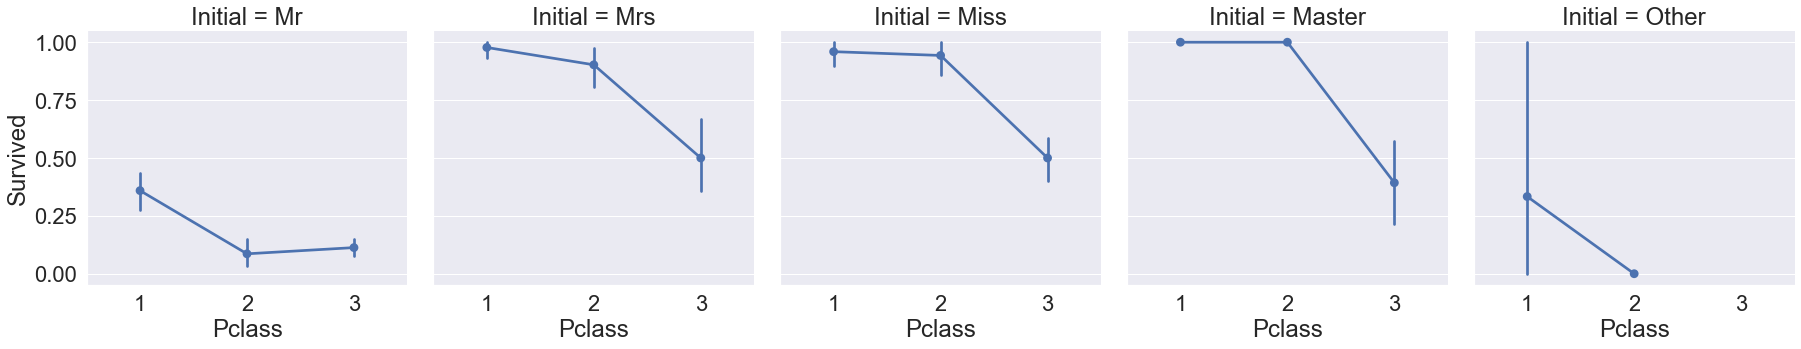

In [28]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.
- 여자와 아이들은 Pclass와 관게 없이 첫번째이다.

### Embarked -> Categorical Value

In [29]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

Chances for Survival by Polrt of Embarkation

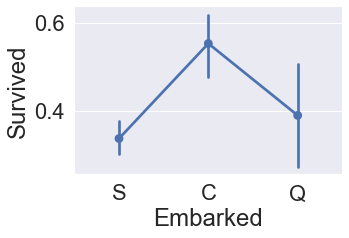

In [30]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is hightest around 0.55 while it tis lowest for S.
- C에서가 가장 생존률이 높고 S에서가 가장 낮다.

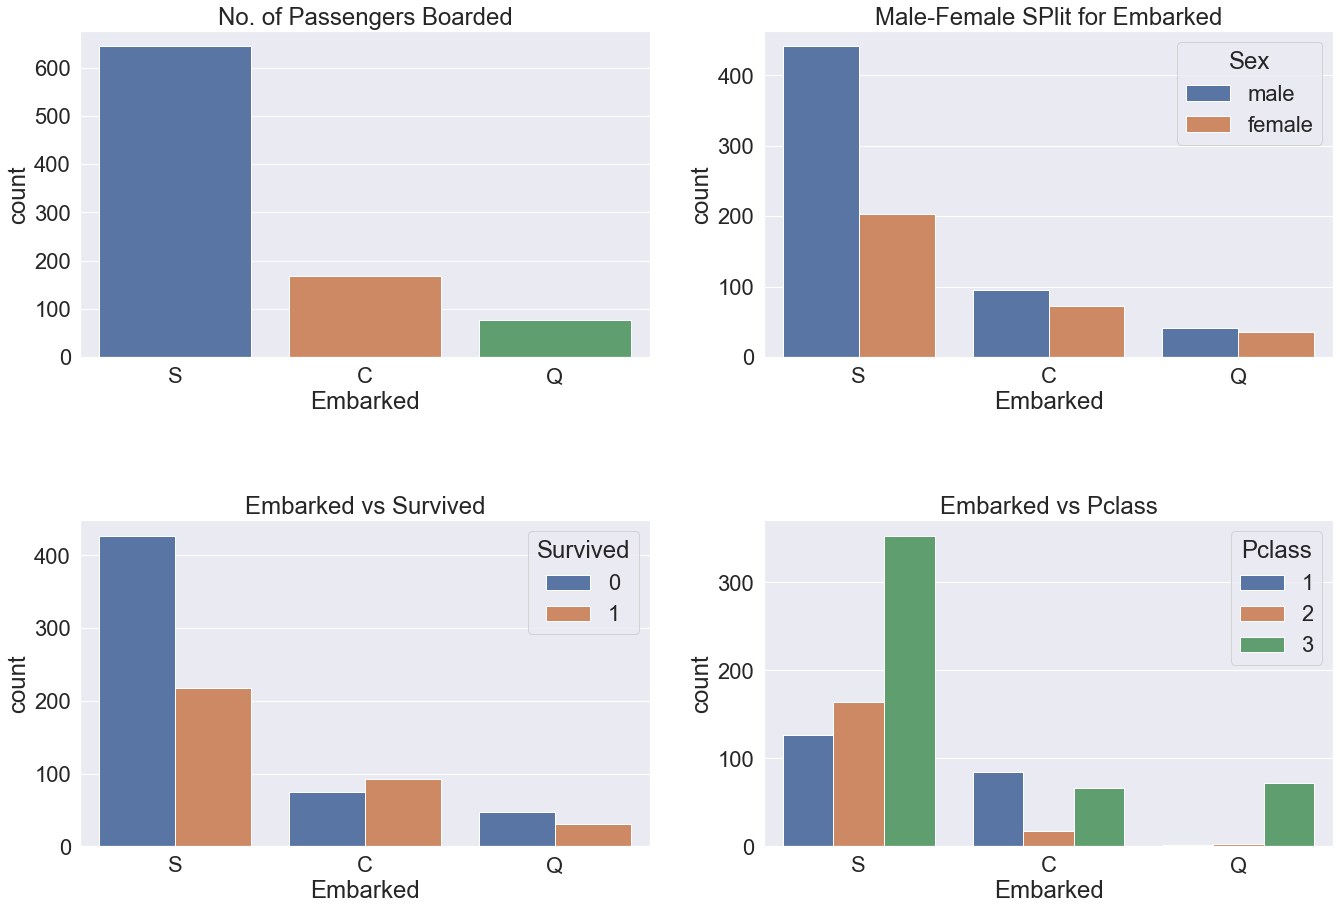

In [31]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male-Female SPlit for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**

1) Maximum passengers boarded from S. Majority of them being from Pclass3.
- S에서 가장 많이 탔고 Pclass3 사람이 주였다.

2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 PAssendgers.
- C는 좋은 생존률을 보인다. 이유는 Pcalss1, Pclass2 승객을 모두 살렸기 때문이다.

3) The Embark S looks to the prot from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
- 부자들 중에서는 S에서 탄사람이 많아보인다. 그러나 생존률은 낮다. 이는 Pclass3 사람들이 81%가 죽었기 때문

4) Port Q han almost 95% of the passengers were from Pclass3.
- Q에서는 95% 가까이의 승객이 Pclass3 이다.

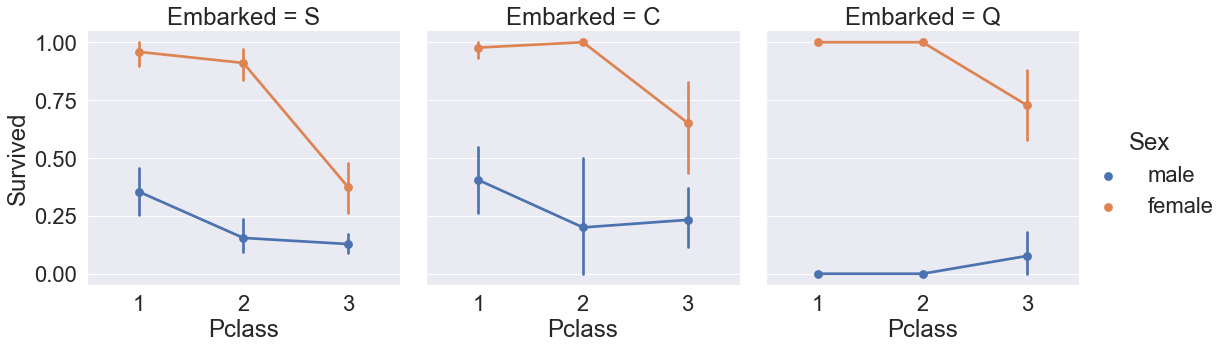

In [32]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

**Observations:**
1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective fo the Pclass.
- Pclass와 무관하게 Pclass 1, 2의 여자는 거의 생존률이 1에 가깝다.

2) Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.(Money Matters)
- S 항구의 Pclass3 사람들은 여자 남자 모두 생존률이 낮다.

3) Port Q looks to be unlukiest for Men, as almost all were from Pclass 3.
- Q 항구의 남자는 아주 운이 없다. 이는 거의 Pclass 3 사람이기 때문이다.

Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S.
- S 항구에서 가장 많이 탑승했기 때문에 빈 값은 S로 채워준다.

In [33]:
data['Embarked'].fillna('S', inplace = True)

In [34]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

### SibSip -> Discrete Feature

This feature represents whether a person is alone or with his family members.

sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [35]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


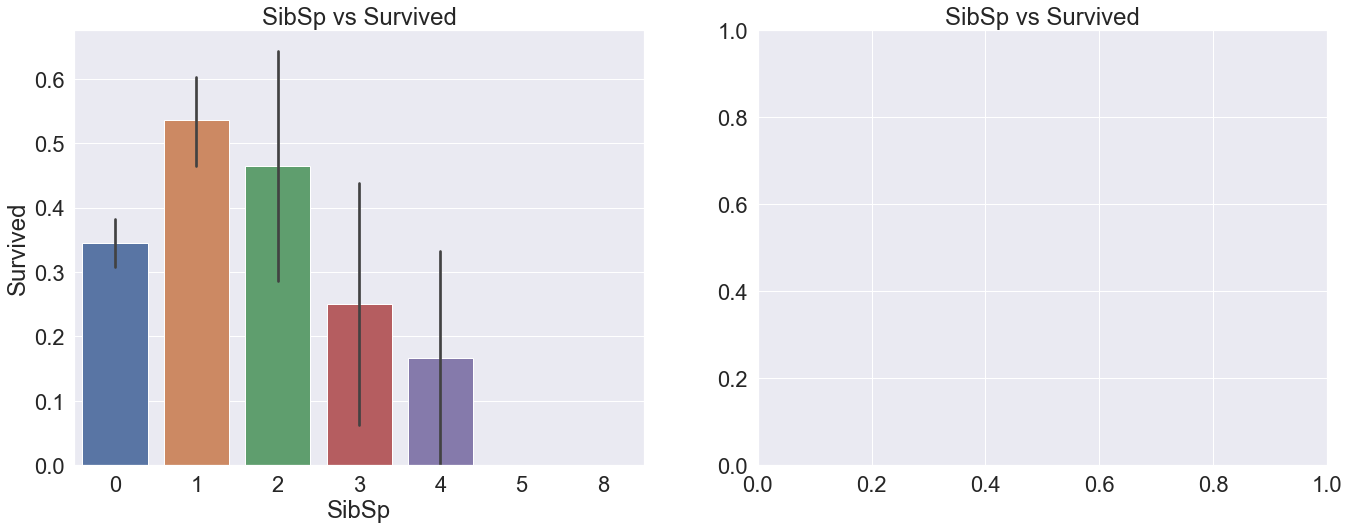

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

factorplot이 그려지지 않음 왜?

In [37]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:

the barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughtly decreases if the number of siblings increase. This makes sense. that is. if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8members is 0%. The reason may be Pclass?
- 혼자있는 경우 생존률이 34.5%이다. 친척이 늘어날수록 생존률은 줄어든다. 

the reason is Pclass. the crosstab shows that person with SibSp > 3 were all in Pclass3. it is imminent that all the large families in Pclass3(>3) died.
- 3명 이상인 사람은 모두 Pclass 3이다. 따라서 생존률이 낮았다.

Parch

In [38]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

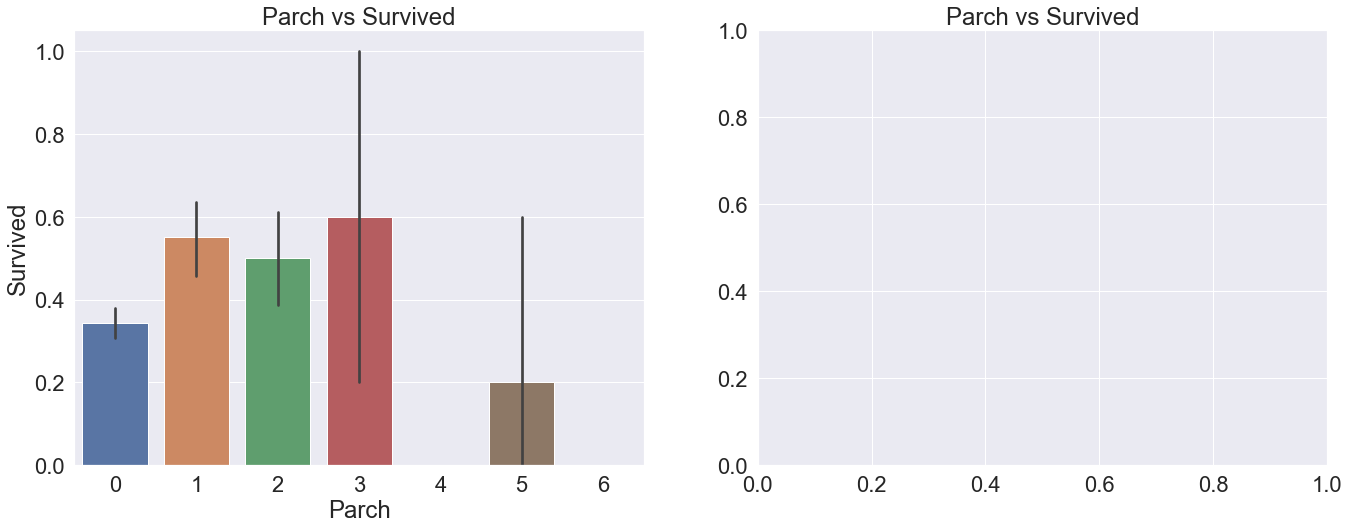

In [39]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Observations:

here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It howerver redudes as the number goes up.
- 부모와 같이 탄 승객은 생존률이 더 높았다. 하지만 그 수가 커지면 낮아진다.

the chances of survival is good for somebody who has 1-3 parents on the ship. being alone alse proves to be fatal and the chances for survival decreases when sombody has > 4 parents on the ship.
- 1-3명의 부모와 같이 탄 사람은 생존률이 좋았고 4명이 넘으면 생존률이 낮아졌다.

 Feature Engineering
 
 - 1st 클래스, 여성, S and C 가 생존률이 높았다.
 - Sibsp > 3 생존률 낮다.
 

In [40]:
data['new_cat_pclass_sex'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str)

<AxesSubplot:xlabel='new_cat_pclass_sex'>

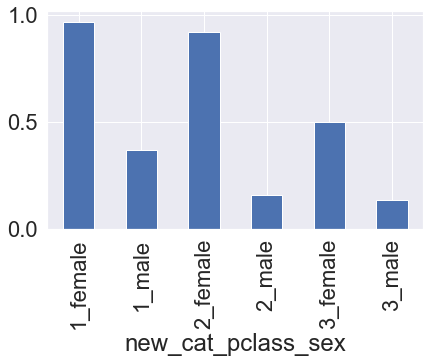

In [41]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

In [42]:
data['new_cat_pclass_sex_embarked'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str) +'_' + data['Embarked'].astype(str)

<AxesSubplot:xlabel='new_cat_pclass_sex_embarked'>

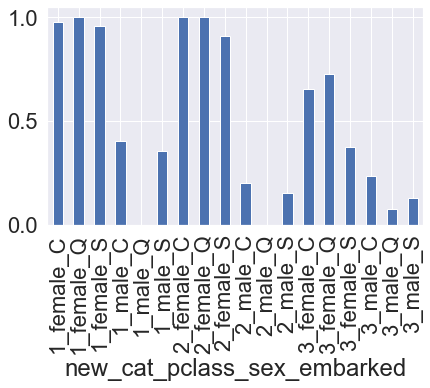

In [43]:
data.groupby('new_cat_pclass_sex_embarked')['Survived'].mean().plot.bar()

너무 많은 카테고리는 분석이 어렵다.

### Fare ->continuous Feature

In [44]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The lowest fare is 0.0.

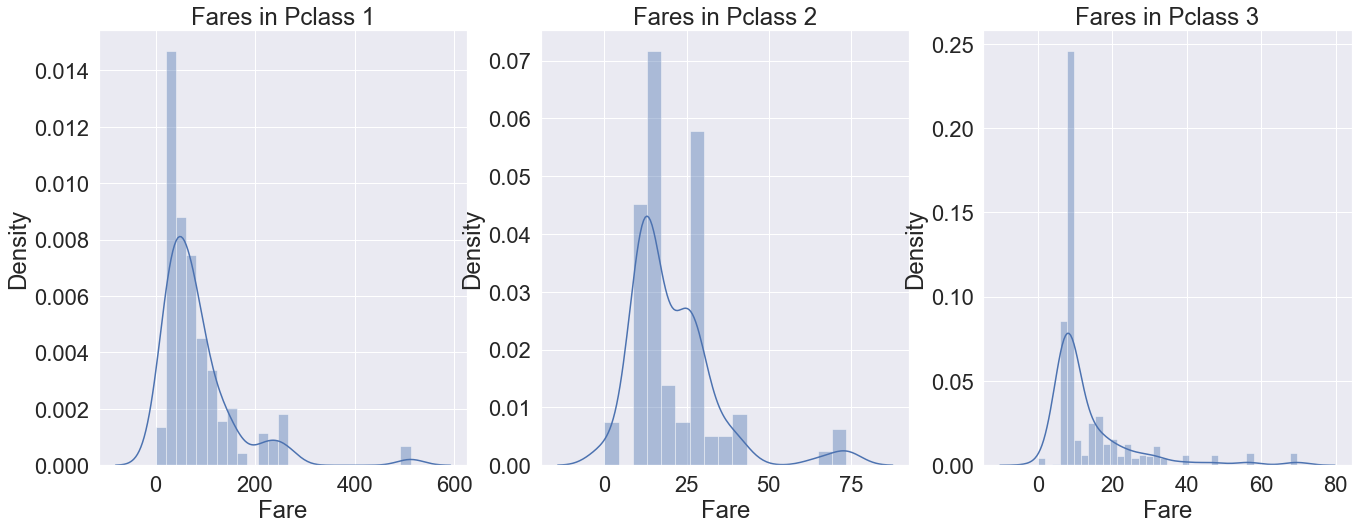

In [45]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')


sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasign as the standards reduces. As this is alse continuous, we cna convert into discrete values by using binning.

- Pclass1은 넓은 요금분포를 가지고 요금이 커질수록 밀도가 감소한다.continuous하기 때문에 별개의 값으로 바꿀 수 있다. 이진화를 이용하여

**Observations in a Nutshell for all features:**

Sex : The chance of survival for women is high as compared to men.
- 여자가 남자보다 생존률이 높다.

Pclass : there is a visible trend thatbeing a 1st class passenger gives you better chances of survival. the survival rate for Pclas3 is very low. for women, the chanced of survival from Pclass1 is almost 1 and is high too for those from Pclas2. Money wins!!!.
- 1st 승객은 생존률아ㅣ 높고 Pclass3는 매우 낮다. 여자의 경우 Pclass1은 거의 생존률이 1이다. Pclass2보다도 보다.
Age : children less than 5-10years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.
- 5-10살의 생존률이 높다. 15-35은 많이 죽었다.

Embarked : this is va very interesting feature. The chances of survial at C look to be better than even though the majority of Pclass 1 passengers got up at S. Passenger at Q were all form Paclass3.
- C에서 탄사람이 S에서 탄사람보다 생존률이 높았다. S에서는 Pclass 1 사람이 많았음에도 불구하고. Q에서 탄사람의 거의 Pclass 3였다.

PArch+SibSp: Having 1-2 siblings, spuse on board or 1-3 Parents shows a greater chance of probalbity rather than being alone or having a large faily travelling with you.
- 1-2 천척, 배우자나 1-3 부모님과 함께 탄 승객은 생존률이 높았다. 


### Correlation Between The Features

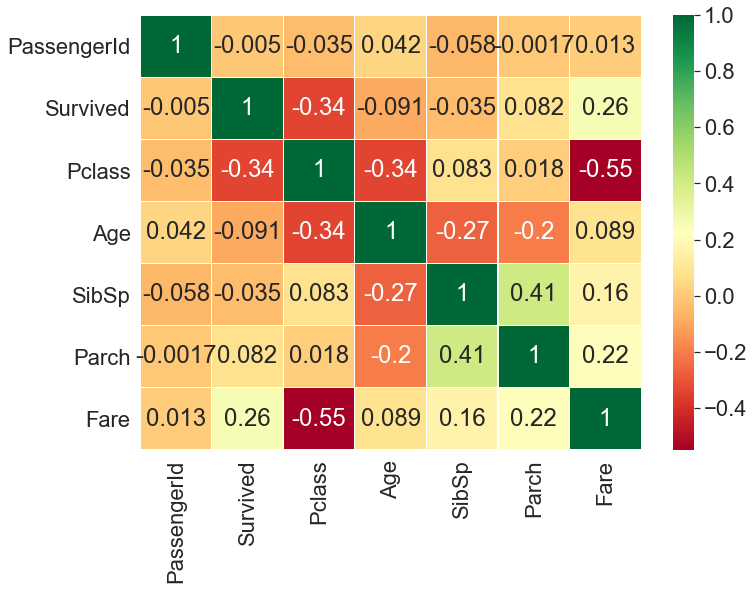

In [46]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**Interpreting The heatmap**

the first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.
- 처음에 알파벳이나 문자열은 상관관계를 알 수 없기때문에 숫자적 특성에 주목해야한다.

POSITIVE CORREALATION:
If an increase in feature A leads to increaws in feature B, then they are positvily correlated. A value 1 menas perfoect posive correlation
- 좋은 상관관계: A 특성이 증가할 때 B 특성도 같이 증가한다면 좋은 상관관계이다.

NEGATIVE CORRELATION:
If an increase in feature A leads to decrease in feaure B, then they are negatively correlated. A value -1 means perfect negative correlation.
- 나쁜 상관관계 : A 특성이 증가할 때 B 특성이 감사한다면 나쁜 상관관계이다.

Now lets say the tow features are hightly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the featrues are containing hightly similar information and there is very little or no variance in information. this is known as MultiColinearriy as both of them contains almost the same information.
- 상관관계가 높다는 것은 두 특성이 매우 비슷하다는 정보이고 이는 다양성이 없다는 것을 의미한다. 이는 다상관선형성이라고 하며 거의 같은 정보를 가지고 있다는 것이다.

so do you think we should use both of them as one of them is redundat. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.
- 그래서 둘 중 하나는 불필요하다. 모델을 만들거나 훈련시킬 때 불필요한 특성을 제거하는 것이 훈련 시간도 아끼고 많은 이점들이 있다.


Now from the above heatmap, we can see that the features are not much correlated. The hightest corelation is beween SibSP and PArch i.e 0.41. So we can carry on with all features.
- 가장 높은 상관관계는 SIbSP와 Parch 이며 이는 0.41이다. 

## Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. there maybe many redundant features which should be eliminated. also we can get or add new features by observing or extracting information from other features.
- 모든 특성이 중요하지는 않다. 삭제해야하는 불필요한 특성이 있다. 관찰하거나 다른 특성으로부터 추출한 정보로 새로운 특성을 추가하거나 얻을 수 있다.

An example would be getting the initials feature using the name Feature. Lets see if we can get any new features and eliminate a few. also we will tranfrom the existing relevant features to suitable form for Predictive Modelling.
- Name 특성을 이용하여 initial 특성을 얻은 예가 있다. 우리는 새로운 특성을 얻을 수도 제거할수도 있다. 또는 존재하는 관련있는 특성을 예측모델에 적합하게 변형시킬 것이다. 

## Age_band

Problem with Age Feature:
As I have mentioned earlier that Age is a continuous feature. there is a problem with Continous Variables in Machine Learning Models.
- Age 특성은 연속적인 특성이다. 머신러닝 모델에서 연속적인 변수는 문제가 있다.

Eg: If i say to group or arrange Sports Person by sex, we can easily segregate them by Male and Female.
- 예를 들어: 스포츠인을 성별로 나누라고하면 우리는 남성과 여성으로 쉽게 나눌 수 있다.

Now if I say to group them by their age, then how would you do it? If there are 30 PErsons, there may be 30 age values. Now this is problematic.
- 나이로 나누라고 한다면 어떻게 하겠는가? 30명이 있다면 30개의 값으로 있는 것이다. 이는 문제적이다.

We need to convert these continuous values into categorical values by either Binning or Normalization. I will be using binning i.e toroup a range of ages into a single bin or assign them a single value.
- 우리는 연속적인 값을 이진화나 표준화를 통해 범주형 값으로 바꿔야한다. 나는 이진화를 사용할 것이다. 이는 나이의 범위를 묶어 한개의 양지나 하나의 값으로 처리하는 것이다.

Okay so the maximum age of a passenger was 80. So lets divivde the range from 0-80 into 5 bins. So 80/5 = 16 bins of size 16.
- 최고령이 80살이기 때문에 0부터 80살까지를 5개의 양자로 나눌것이다. 크기가 16이 된다.

In [47]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2


In [48]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


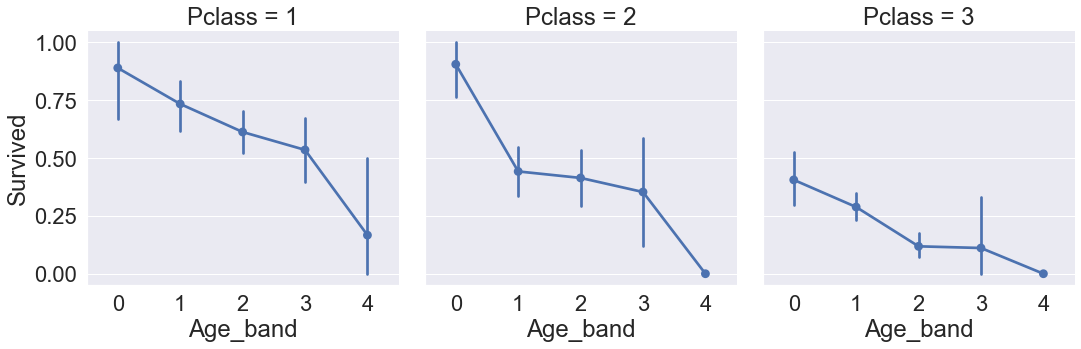

In [49]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

true that.. the survival rate decreases as the age increases irrespective of the Pclass
- 생존률은 나이가 증가함에다라 감소하였다. Pclass와 관계 없이

### Family_Size and Alone
At this point, we can create a new feature called "Family_size"and Alone" and analyse it. This feature is the summation of Parch and SibSp. It giaves us a combined data so that we can check if survival rate have anything to do with family size of the pasesengers. alone will denote whether a passenger is alone or not.
- Family_size and Alone이라는 새로운 특성을 만들고 분석할 수 있다. 이 특성은 Parch와 SibSp의 합이다. 이는 결합 데이터를 주고 우리는 승객의 가족의 크기와 관련있는 생존률을 확인할 수 있다. Alone은 승객이 혼자 인지 아닌지를 의미한다.

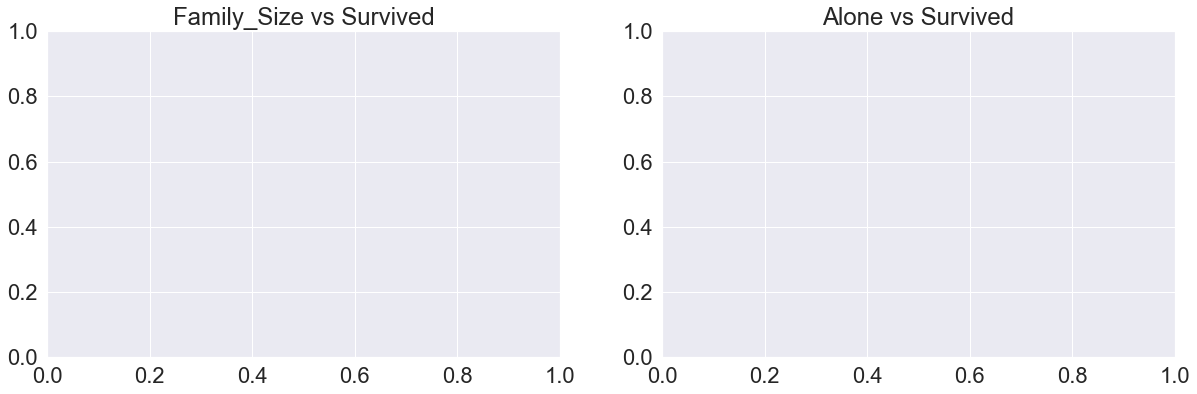

In [50]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_Size', 'Survived', data = data)
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

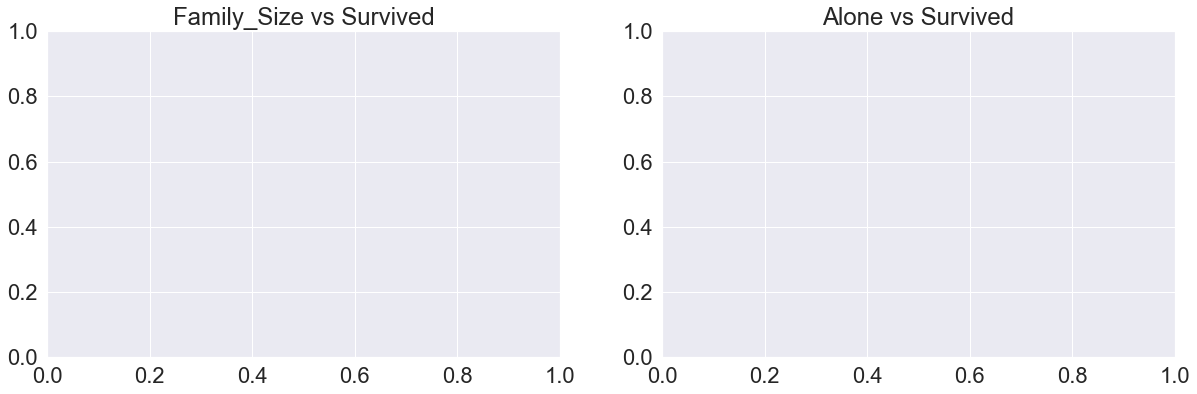

In [51]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax = ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

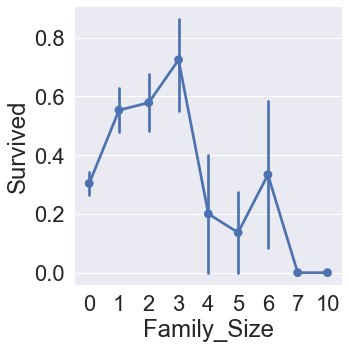

In [52]:
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])

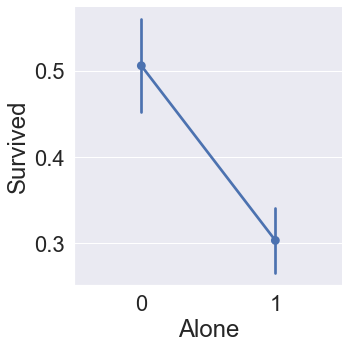

In [53]:
sns.factorplot('Alone','Survived',data=data,ax=ax[1])

Family_Size = 0 means that the passenger is alone. clearly, if you are alone or family_size = 0, then chances for survival is very low. For family size > 4, the cahances decrease too. this also looks to be an importnat feature for the model. lets examine this further.
- Famil_Size가 0이면 혼자를 의미한다. 만약 혼자거나 Famil_size가 0이면 생존률은 낮다. family_size가 4보다 크면 생존률이 낮아진다. 이것은 중요한 특성이다. 

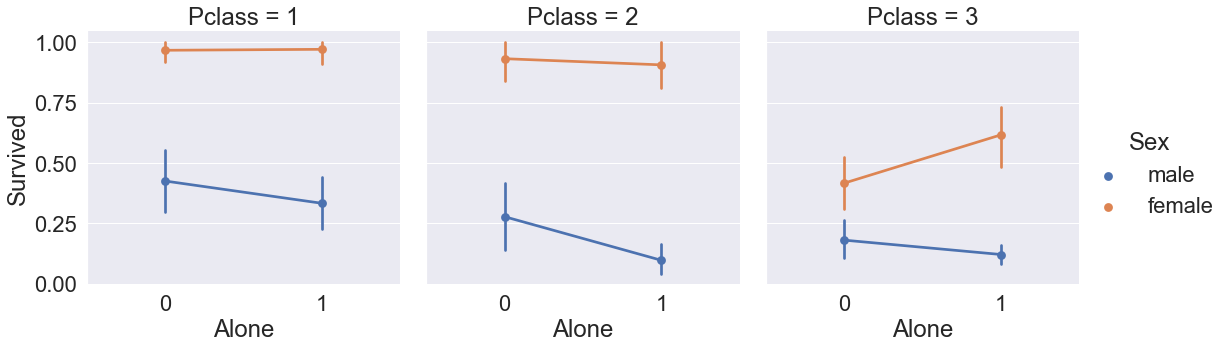

In [54]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.
- 이는 Pclass3의 가족과 있는 것보다 혼자가 더 비율이 높은 여자를 제외하고, 성별과 Pclass와 상관없이 혼자이면 좋지 않다.[](http://) 

### Fare_Range

since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.
- 요금은 연속적인 특성이기대문에 우리는 순서있는 값으로 바꿔야한다. pandas.qcut을 이용할다.

So what qcut doex is it splits or arranges the values according the number of bins we have passed. Sor if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or vvalue ranges.
- qcut은 범위에 해당하는 양자 개수를 동등하게 하여 범위를 나누는 것이다. 
- cut은 범위의 크기를 일정하게 하여 나누는 것이다.

In [55]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, the chanceds of survival increases.
- Fare_range가 증가하면 생존률도 증가한다는 것을 명확하게 알 수 있다.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band
- 우리는 Age_Band 처럼 양자화하여 변환해야한다.

In [56]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3


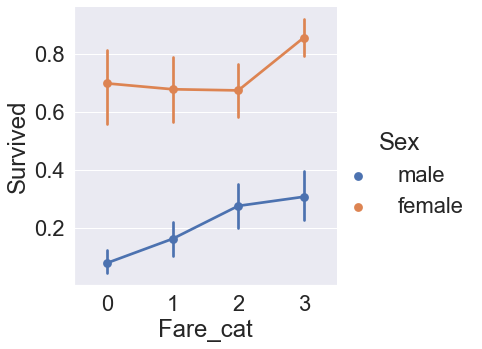

In [57]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an importnat feature during modeling along with the Sex.
- 명백하게, Fare_cat이 증가함에 따라, 생존률도 증가한다. 이 특성은 성별에 관한 모델링을 하는 동안 중요한 특성이 될 수 있다. 

### Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features lok Sex, Embarked, etc into numeric values.
- 우리는 문자열을 머신러닝 모델이 넘길 수 없기 때문에, 우리는 Sex, Embarked등을 숫자의 값으로 변환해야한다.

LabelEncoder 사용

In [58]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [col for col in data.columns if data[col].dtypes == 'object']
cat_cols
for col in ['Sex', 'Embarked', 'Initial']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

factorize로 라벨링하기 - LabelEncoder보다 속도가 빠름

In [59]:
indexer = {}
for col in ['Sex', 'Embarked', 'Initial']:
    _, indexer[col] = pd.factorize(data[col])
    
indexer[col].get_indexer(data[col])

array([0, 1, 2, 1, 0, 0, 0, 3, 1, 1, 2, 2, 0, 0, 2, 1, 3, 0, 1, 1, 0, 0,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2,
       2, 0, 0, 2, 0, 1, 3, 0, 1, 1, 0, 0, 2, 0, 2, 3, 0, 2, 0, 3, 0, 3,
       1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 4, 4, 1, 0, 0,
       0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 3, 3, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0,
       3, 2, 0, 0, 2, 0, 3, 3, 2, 0, 1, 0, 0, 0, 1, 0, 2, 3, 1, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 1, 0, 4, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 3, 0, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2,

원본

In [60]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int32)' and 'str'

Dropping UnNeeded Features
Name -> we don't nee name feature as it cannot be converted into any categorical value.

Age -> We have the Age_band feature, so no need of this.

Ticket -> It is any random string that cannot be categorised.

Fare -> We have the Fare_cat feature, so unnedded

Cabin  -> A lot of NaN values and also many pasesenvers have muliple cabins. So this is a useless feature.

Fare_Range -> We have the Fare_cate Feature.

PassengerID -> Cannot be categorised.

In [63]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range','PassengerId'], axis = 1, inplace = True)

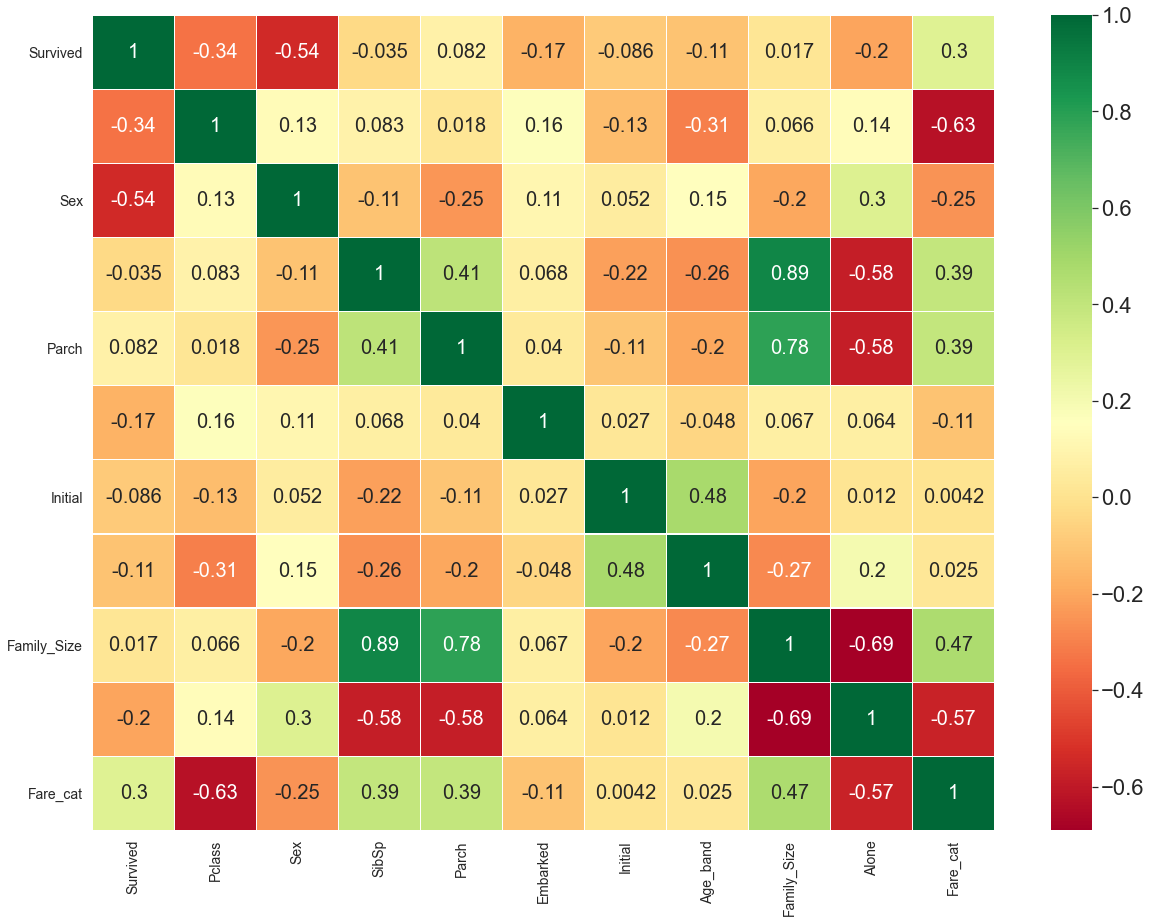

In [64]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Now the above correlation plot, we can see some positively related features. Som of them being SibSp and Family_size and PArch and Family_size and som negitive ones like Alone and Family_size
- 위의 상관관계를 보면 몇몇 양으로 관련된 특성들이 있다. SibSp와 Family_size 그리고 PArch와 Family_size이다. Alone과 Family_size처럼 음의 상관관계도 있다. 
